## Pandas analysis

This exercise consists in analyzing a dataset containg timing information from a series of Time-to-Digital-Converters (TDC) implemented in a couple of FPGAs. Each measurement (i.e. each row of the input file) consists of a flag that specifies the type of message ('HEAD', which in this case is always 1), two addresses of the TDC providing the signal ('FPGA' and 'TDC_CHANNEL'), and the timing information ('ORBIT_CNT', 'BX_COUNTER', and 'TDC_MEAS'). Each TDC count corresponds to 25/30 ns, whereas a unit of BX_COUNTER corresponds to 25 ns, and the ORBIT_CNT is increased every 'x' BX_COUNTER. This allows to store the time in a similar way to hours, minutes and seconds.

In [1]:
# If you didn't download it yet, please get the relevant file now!
!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ~/data/

--2021-11-24 00:06:40--  https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt
Resolving www.dropbox.com (www.dropbox.com)... 162.125.69.18, 2620:100:6025:18::a27d:4512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.69.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/xvjzaxzz3ysphme/data_000637.txt [following]
--2021-11-24 00:06:40--  https://www.dropbox.com/s/raw/xvjzaxzz3ysphme/data_000637.txt
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc276bc83f0caf9e5dde7c3584f2.dl.dropboxusercontent.com/cd/0/inline/Ban2w3u_ZnW7TRJ-s49yfXm_JYRCL5eSBNyounWvcH5g-yjetCtnhc3-GNqcz9QVDv9Mxco4kEx15j3r-Ch6faANb4VGmzDpH06gbyBVbrR7mLGvGgfEpk6xk-SI6Aof32fjPP4WvDn49s5VzfEh0jlm/file# [following]
--2021-11-24 00:06:41--  https://uc276bc83f0caf9e5dde7c3584f2.dl.dropboxusercontent.com/cd/0/inline/Ban2w3u_ZnW7TRJ-s49yfXm_JYRCL5eSBNyounWvcH5g-yjetCtnhc3-GNqcz9QVDv9Mxco4kEx15j

 15950K .......... .......... .......... .......... .......... 49% 19.0M 2s
 16000K .......... .......... .......... .......... .......... 49% 22.7M 2s
 16050K .......... .......... .......... .......... .......... 49% 29.8M 2s
 16100K .......... .......... .......... .......... .......... 49% 19.1M 2s
 16150K .......... .......... .......... .......... .......... 49% 5.25M 2s
 16200K .......... .......... .......... .......... .......... 50% 9.56M 2s
 16250K .......... .......... .......... .......... .......... 50% 7.87M 2s
 16300K .......... .......... .......... .......... .......... 50% 25.0M 2s
 16350K .......... .......... .......... .......... .......... 50% 19.9M 2s
 16400K .......... .......... .......... .......... .......... 50% 17.5M 2s
 16450K .......... .......... .......... .......... .......... 50% 18.6M 2s
 16500K .......... .......... .......... .......... .......... 51% 17.0M 2s
 16550K .......... .......... .......... .......... .......... 51% 3.75M 2s
 16600K ....

1\. Create a Pandas DataFrame reading N rows of the 'data_000637.txt' dataset. Choose N to be smaller than or equal to the maximum number of rows and larger that 10k.

2\. Find out the number of BX in a ORBIT (the value 'x').

3\. Find out how much the data taking lasted. You can either make an estimate based on the fraction of the measurements (rows) you read, or perform this check precisely by reading out the whole dataset.

4\. Create a new column with the absolute time in ns (as a combination of the other three columns with timing information).

5\. Replace the values (all 1) of the HEAD column randomly with 0 or 1.

6\. Create a new DataFrame that contains only the rows with HEAD=1.

7\. Make two occupancy plots (one for each FPGA), i.e. plot the number of counts per TDC channel

8\. Use the groupby method to find out the noisy channels, i.e. the TDC channels with most counts (say the top 3)

9\. Count the number of unique orbits. Count the number of unique orbits with at least one measurement from TDC_CHANNEL=139

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,123,3869200167,2374,26
1,1,0,124,3869200167,2374,27
2,1,0,63,3869200167,2553,28
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25
...,...,...,...,...,...,...
9995,1,0,61,3869200267,696,11
9996,1,0,60,3869200267,701,5
9997,1,0,59,3869200267,707,23
9998,1,0,63,3869200267,706,15


The number of BX in a ORBIT is: 3564
The data taking lasted: 0.98042 s.


,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,NANOSECONDS
0,1,0,123,3869200167,2374,26,0.000000e+00
1,1,0,124,3869200167,2374,27,8.333300e-01
2,1,0,63,3869200167,2553,28,4.476667e+03
3,1,0,64,3869200167,2558,19,4.594167e+03
4,1,0,64,3869200167,2760,25,9.649167e+03
...,...,...,...,...,...,...,...
1310715,1,0,62,3869211171,762,14,9.804161e+08
1310719,1,0,61,3869211171,762,18,9.804161e+08
1310716,1,1,4,3869211171,763,11,9.804161e+08
1310717,1,0,64,3869211171,764,0,9.804161e+08


,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,123,3869200167,2374,26
1,0,0,124,3869200167,2374,27
2,0,0,63,3869200167,2553,28
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25
...,...,...,...,...,...,...
9995,0,0,61,3869200267,696,11
9996,0,0,60,3869200267,701,5
9997,1,0,59,3869200267,707,23
9998,0,0,63,3869200267,706,15


,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,123,3869200167,2374,26
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25
5,1,0,63,3869200167,2762,4
8,1,0,62,3869200167,2774,21
...,...,...,...,...,...,...
9986,1,0,139,3869200267,616,0
9988,1,0,56,3869200267,617,27
9989,1,0,62,3869200267,612,1
9997,1,0,59,3869200267,707,23


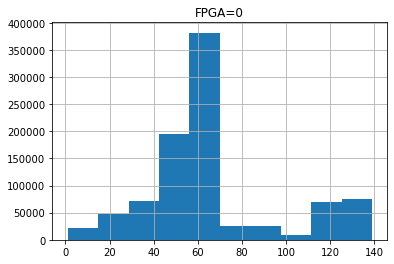

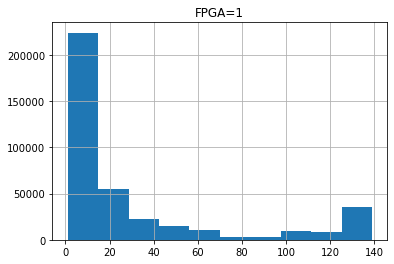

The top 3 noisy channels for FPGA=0 are:
 FPGA  TDC_CHANNEL
0     139            75617
      64             64581
      63             63724
Name: TDC_MEAS, dtype: int64
The top 3 noisy channels for FPGA=1 are:
 FPGA  TDC_CHANNEL
1     2              32669
      139            32442
      1              28438
Name: TDC_MEAS, dtype: int64
The number of unique orbits is:  11001
The number of unique orbits with at least one misure from channel 139 is:  10976


In [25]:
import pandas as pd
import numpy as np

#1. Create a Pandas DataFrame reading N rows of the 'data_000637.txt' dataset. Choose N to be smaller than or equal to the maximum number of rows and larger that 10k.
N=10000
datas = pd.read_csv('data_000637.txt', sep=",", header=0) 
                       #names=['HEAD','FPGA','TDC_CHANNEL','ORBIT_CNT','BX_COUNTER','TDC_MEAS'])
df=pd.DataFrame(data=datas)
dn=df.head(N)
display(dn)

#2. Find out the number of BX in a ORBIT (the value 'x').
maxi=df['BX_COUNTER'].max()
print
print("The number of BX in a ORBIT is:", maxi+1)

#3. Find out how much the data taking lasted. You can either make an estimate based on the fraction of the measurements (rows) you read, or perform this check precisely by reading out the whole dataset.
maxorb=df["ORBIT_CNT"].max()
t=df[df['ORBIT_CNT']==maxorb]
maxbx=t["BX_COUNTER"].max()
bc=t[t['BX_COUNTER']==maxbx]
maxmeas=bc["TDC_MEAS"].max()

sec=maxbx*25+(maxorb*(maxi+1))*25+maxmeas*5/6

minorb=df["ORBIT_CNT"].min()
e=df[df['ORBIT_CNT']==minorb]
minbx=e["BX_COUNTER"].min()
bb=e[e['BX_COUNTER']==minbx]
minmeas=bb["TDC_MEAS"].min()

sec1=minbx*25+(minorb*(maxi+1))*25+minmeas*5/6
time=(sec-sec1)*10**(-9)

print("The data taking lasted:",round(time,5),"s.")

#4. Create a new column with the absolute time in ns (as a combination of the other three columns with timing information).
l=[]    
for j in df["ORBIT_CNT"]:
    t=(j-minorb)*25*(maxi+1)
    l.append(t)

l1=[]
for i in df["BX_COUNTER"]:
    one=i*25
    l1.append(one)

l3=[]    
for w in df["TDC_MEAS"]:
    l3.append(w*25/30)
    
nouveau=[]   
for x,y,z in zip(l,l1,l3):
    a=(x+y+z)-(minbx*25+minmeas*5/6)
    nouveau.append(round(a,5))
    
df["NANOSECONDS"]=nouveau
df_time=df.sort_values(by="NANOSECONDS")
display(df_time)

#5. Replace the values (all 1) of the HEAD column randomly with 0 or 1.
import random
dn_copy = dn.copy()
lis=[]
while len(lis)<len(dn_copy-1):
    n = random.randint(0,1)
    lis.append(n)
dn_copy["HEAD"]=lis
display(dn_copy)

#6. Create a new DataFrame that contains only the rows with HEAD=1.

new_df=dn_copy[dn_copy['HEAD']==1]

display(new_df)

#7. Make two occupancy plots (one for each FPGA), i.e. plot the number of counts per TDC channel

import matplotlib.pyplot as plt

first = df[df['FPGA']==0]
first.hist('TDC_CHANNEL')
plt.title('FPGA=0')
second = df[df['FPGA']==1]
second.hist('TDC_CHANNEL')
plt.title('FPGA=1')
plt.show()

#8. Use the groupby method to find out the noisy channels, i.e. the TDC channels with most counts (say the top 3)

a=first.groupby(['FPGA', 'TDC_CHANNEL'])['TDC_MEAS'].count()
a_ordered=a.sort_values(ascending = False)
b=second.groupby(['FPGA', 'TDC_CHANNEL'])['TDC_MEAS'].count()
b_ordered=b.sort_values(ascending = False)
print("The top 3 noisy channels for FPGA=0 are:\n",a_ordered.head(3))
print("The top 3 noisy channels for FPGA=1 are:\n",b_ordered.head(3))

#9. Count the number of unique orbits. Count the number of unique orbits with at least one measurement from TDC_CHANNEL=139
u_o= df.drop_duplicates(subset = ["ORBIT_CNT"])
print('The number of unique orbits is: ',len(u_o))

df139 = df[df['TDC_CHANNEL']==139]
u_139= df139.drop_duplicates(subset = ["ORBIT_CNT"])
print('The number of unique orbits with at least one misure from channel 139 is: ', len(u_139) )